In this activity you will implement the convolution operation. Your implementation will
detect edges in an image. You are required to implement you own convolution function and 
NOT use existing libraries. Please use the my-cat.csv as your input. Your task is to complete
the convolution2D() function in the code below. Hint: You will need to multiply each input pixel
    (3x3 neighbor grid) of the input 2D array image2D with the input filter kernel3x3 to obtain 
    the output 2D array convolved2D. Note: If you use existing libraries such as scipy.signal.convolve2d 
        you will not receive any points for your submission.

Articles: First four paragraphs under the section "2D Convolutions: The Operation"
Lectures: Convolution operation


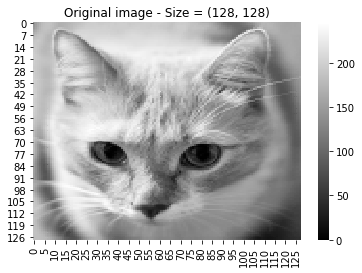

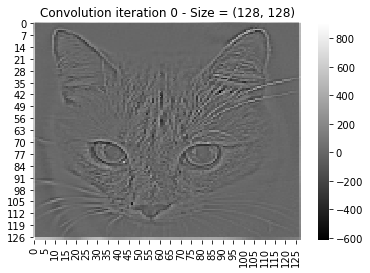

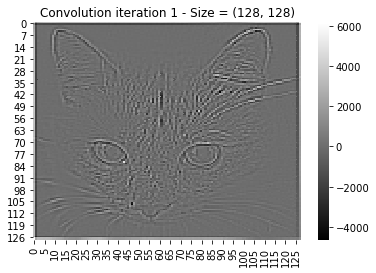

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def convolution2D(image2D, kernel):
    convolved2D = np.zeros((len(image2D), len(image2D)))
     # Add zero padding to the input image
    image_padded = np.zeros((image2D.shape[0] + 2, image2D.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image2D
     # Loop over every pixel of the image
    for x in range(image2D.shape[1]):
        for y in range(image2D.shape[0]):
            # element-wise multiplication of the kernel and the image
            convolved2D[y, x]=(kernel * image_padded[y: y+3, x: x+3]).sum()

    return convolved2D

image2D = np.loadtxt('my-cat.csv', delimiter=',')
sns.heatmap(image2D, cmap='gray')
plt.title('Original image - Size = ' + str(image2D.shape))
plt.show()

edge_detect_filter_3x3 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

for i in range(2):
    convolved_image = convolution2D(image2D, edge_detect_filter_3x3)
    sns.heatmap(convolved_image, cmap='gray')
    plt.title('Convolution iteration ' + str(i) + ' - Size = ' + str(convolved_image.shape))
    plt.show()
    image2D = convolved_image